## Домашнее задание №3

### Медведев Вальдемар Сергеевич 20214

Добрый день,  

Вам предлагается ответить на ряд вопросов для того, чтобы закрепить пройденный материал
Если у вас возникнут вопросы или сомнения, обязательно пишите/звоните.  
Не стесняйтесь спрашивать, помните, что самый глупый вопрос &mdash; незаданный вопрос.
  
Я надеюсь, что предложенные задания вы будете выполнять самостоятельно. При этом я не подразумеваю, что все необходимо сделать в гордом одиночестве, наоборот, призываю вас обмениваться мнениями, советоваться, но все-таки не стоит просто копировать чужой код &mdash; в этом случае вы обманете не меня) и кроме того, лишите себя удовольствия разобраться в решении.
  
Код, который вы пришлете, должен быть рабочим...

### Импортируем необходимые модули 

In [53]:
import numpy as np
import scipy, warnings, copy
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_regression, make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import auc

from sklearn.preprocessing import StandardScaler

%matplotlib inline 

In [54]:
## функция для генерации "предсказаний" с заданным уровнем ошибок 
def make_errors(Y, frac = .3, seed = 42):
    """
    Y - our "true" binary labels
    frac - the "desired" error rate
    """
    np.random.seed(seed)
    ## выберем индексы ответов, которые у нас будут ошибочными
    ix = np.random.choice(range(len(Y)), replace=False, size =int(len(Y) * frac)) 
    Ys = copy.copy(Y) ## создадим копию массива с ответами, чтобы не изменять оригинальные ответы
    Ys[ix] = np.abs(Y[ix] - 1) ## инвертируем метки классов
    return Ys

### В этом задании у вас пара сгенерированных заранее датасетов, остальные есть в этом ноутбуке. В этом домашнем задании 5 пунктов + 1 бонусный. Всего за эту домашку можно получить 8 баллов.

Рекомендую внимательно ознакомиться с материалами, которые я вам выдал, посмотреть ссылки на дополнительные материалы, а для заинтересованных в теме &mdash; пройти дополнительные курсы по анализу данных и машинному обучению. Прошу обратить внимание на задания и вопросы, которые изредка, но встречаются в ноутбуках данного курса. Лучше их все-таки выполнить. Если не можете что-то сделать самостоятельно &mdash; спрашивайте.

### 1. Оценка классификаторов (2 балла).

1. В первой части задания вам необходимо работать с заранее сгенерированными массивами предсказанных и настоящих меток классов (Y_predicted, Y_true). Необходимо:

    * Построить для них матрицу ошибок (confusion matrix)
    * Определить Accuracy, Precision, Recall, F1-метрику
    * Построить график ROC, определите значение AUC
    * Проверить, можно ли улучшить качество предсказания метки класса? Верно ли подобрано пороговое значение? (бонусный пункт)
    
    
2. Во второй части задания вам будет дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0. Для него будут доступны новые истинные метки классов, а также результаты предсказания нескольких алгоритмов. От вас требуется:

    * Определить accuracy для каждого из методов. Какой из них лучше? Определить это также и для F1-метрики.
    * Посчитать метрики accuracy и F1 для консенсусных предсказаний (пояснения в коде). Изменилось ли что-нибудь?
    * Какой вывод вы можете сделать из данного упражнения?

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


#### Первая часть

In [56]:
## результаты "предсказания"
# np.random.seed(0) ## зафиксируем random seed
# Yp = np.random.uniform(0, 0.9, 100) ## синтезируем ответы
Y_predicted = np.array([0.49393215, 0.64367043, 0.54248704, 0.49039486, 0.38128932, 0.5813047 , 0.39382849, 0.8025957 ,
            0.86729648, 0.34509737, 0.71255253, 0.47600543, 0.5112401 , 0.83303697, 0.06393245, 0.07841637,
            0.01819656, 0.74935786, 0.70034108, 0.78301093, 0.88075651, 0.71924271, 0.41533143, 0.70247626, 
            0.10644698, 0.57592892, 0.12901796, 0.85020203, 0.46966349, 0.37319575, 0.23810005, 0.69681032, 
            0.4105353 , 0.51159055, 0.01691082, 0.55587195, 0.55088615, 0.5552406 , 0.84937327, 0.61363827,
            0.32355711, 0.39332876, 0.62786808, 0.05420292, 0.60009004, 0.60357408, 0.1893443 , 0.11603367,
            0.28388552, 0.32733969, 0.51317709, 0.39474136, 0.88953645, 0.09184033, 0.18798908, 0.14517857,
            0.58779749, 0.22796244, 0.4196797 , 0.21998303, 0.14307263, 0.09933763, 0.59069663, 0.12436466,
            0.17692413, 0.33185265, 0.73889391, 0.08739115, 0.75415042, 0.08648857, 0.87881352, 0.42178608,
            0.87908498, 0.54436097, 0.66533722, 0.03526901, 0.25452627, 0.10817691, 0.26652618, 0.10685495,
            0.28618486, 0.3728367 , 0.05773275, 0.62322491, 0.50994131, 0.23885054, 0.47092325, 0.08454646,
            0.51835185, 0.83636658, 0.28671206, 0.60066934, 0.11861808, 0.64469448, 0.26046548, 0.16487223,
            0.52786164, 0.01809679, 0.74604603, 0.00422593])
#Y_predicted = np.around(Y_predicted)

## настоящие ответы - метки классов
Y_true = np.array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
            1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
            1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=np.int64)


In [57]:
## 1. Постройте матрицу ошибок -- confusion matrix
print (f'confusion_matrix:\n{confusion_matrix(y_true= Y_true, y_pred=Y_predicted > 0.5)}')

confusion_matrix:
[[47 10]
 [ 9 34]]


In [58]:
## 2. Определите Accuracy, Precision, Recall, F1-метрику
print (f'accuracy_score: {accuracy_score(y_true=Y_true, y_pred=Y_predicted > 0.5)}' )
print(f'precision_score: {precision_score(Y_true, Y_predicted> 0.5)}')
print(f'recall_score: {recall_score(Y_true, Y_predicted> 0.5)}')
print (f'f1_score: {f1_score(y_true=Y_true, y_pred=Y_predicted> 0.5)}')



accuracy_score: 0.81
precision_score: 0.7727272727272727
recall_score: 0.7906976744186046
f1_score: 0.7816091954022988


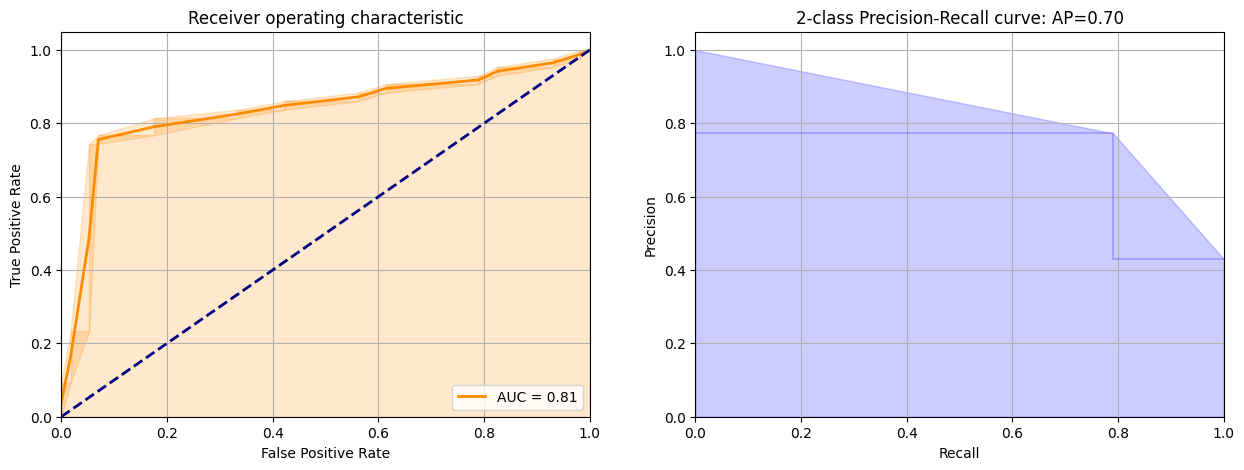

In [59]:
## 3. Постройте график ROC, определите значение AUC
from sklearn import metrics
roc_auc = metrics.roc_auc_score(Y_predicted > 0.5, Y_true)
fpr, tpr, thresholds = metrics.roc_curve(Y_true, Y_predicted)

_, axs = plt.subplots(ncols = 2, figsize = (15, 5))
sns.lineplot(x=fpr, y=tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs[0])
axs[0].fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0]); axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate'); axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic')
axs[0].legend(loc="lower right")
axs[0].grid()


precision, recall, _ = metrics.precision_recall_curve(Y_true, Y_predicted > 0.5)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
average_precision = metrics.average_precision_score(Y_true, Y_predicted > 0.5)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0]);plt.grid()
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

In [60]:
## * 4. Проверьте, можно ли улучшить качество предсказания метки класса? Верно ли подобрано пороговое значение?
## Тут должен быть ваш код
y_score = Y_predicted > 0.53
print(confusion_matrix(Y_true, y_score))
print(f1_score(Y_true,y_score))
print("Если выбрать пороговое значение (0.53 .. 0.54), то можно улучшить")

[[52  5]
 [10 33]]
0.8148148148148148
Если выбрать пороговое значение (0.53 .. 0.54), то можно улучшить


#### Вторая часть 

In [61]:
## Вам дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0
## Y   - истинные метки классов
## Yp1 - результаты предсказания алгоритма 1
## Yp2 - результаты предсказания алгоритма 2
## Yp3 - результаты предсказания алгоритма 3
## Yp4 - результаты предсказания алгоритма 4
np.random.seed(42)
Y =  np.hstack( [ np.ones(20), np.zeros(180) ] ) 
np.random.shuffle(Y)
Yp1 = make_errors(Y, 0.25, seed = 9)
Yp2 = make_errors(Y, 0.25, seed = 42)
Yp3 = make_errors(Y, 0.25, seed = 1024)
Yp4 = np.zeros(200)

In [62]:
## Определите accuracy каждого из методов
print (f'accuracy_Yp1: {accuracy_score(y_true=Yp1, y_pred=Y)}' )
print (f'accuracy_Yp2: {accuracy_score(y_true=Yp2, y_pred=Y)}' )
print (f'accuracy_Yp3: {accuracy_score(y_true=Yp3, y_pred=Y)}' )
print (f'accuracy_Yp4: {accuracy_score(y_true=Yp4, y_pred=Y)}' )



accuracy_Yp1: 0.75
accuracy_Yp2: 0.75
accuracy_Yp3: 0.75
accuracy_Yp4: 0.9


In [63]:
## Какой из методов лучше?
### Последний

In [64]:
## Повторите все для метрики F1
print (f'f1_Yp1: {f1_score(y_true=Yp1, y_pred=Y)}' )
print (f'f1_Yp2: {f1_score(y_true=Yp2, y_pred=Y)}' )
print (f'f1_Yp3: {f1_score(y_true=Yp3, y_pred=Y)}' )
print (f'f1_Yp4: {f1_score(y_true=Yp4, y_pred=Y)}' )
## Yp2 лучше

f1_Yp1: 0.3055555555555555
f1_Yp2: 0.41860465116279066
f1_Yp3: 0.375
f1_Yp4: 0.0


In [65]:
## Используйте результаты моделей №1-3 -- возьмем и усредним результаты их предсказаний:
Yc = ((Yp1 + Yp2 + Yp3)/3 > 0.5).astype(int)
Yc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [66]:
## Оцените результат по метрикам Accuracy и F1, стал ли он лучше? Почему?
print (f'f1_Yc: {f1_score(y_true=Yc, y_pred=Y)}' )
print (f'accuracy_Yc: {accuracy_score(y_true=Yc, y_pred=Y)}' )



f1_Yc: 0.5762711864406781
accuracy_Yc: 0.875


In [67]:
## Можете добавить к вычислению консенсуса результат Yp4. Определите метрики Accuracy и F1. Что изменилось? 
# - значение accuracy увеличилось, f1 уменьшилось
Yc1 = ((Yp1 + Yp2 + Yp3 + Yp4)/4 > 0.5).astype(int)


In [68]:
print (f'f1_Yc: {f1_score(y_true=Yc1, y_pred=Y)}' )
print (f'accuracy_Yc: {accuracy_score(y_true=Yc1, y_pred=Y)}' )


f1_Yc: 0.5161290322580645
accuracy_Yc: 0.925


In [69]:
## Какой вывод вы можете сделать из данного упражнения?

### 2. Исследование корреляций (1 балл).

В вашем распоряжении оказался некий датасет (наблюдения за экспрессией некоторых генов, рекомендательная база данных для ассортимента интернет-маркета, относительный расход электричества в домах в некотором городе и т.д.). Вам необходимо:

1. Посмотреть корреляцию датасета с целевой переменной. Есть ли такие признаки, абсолютное значение коэффициента корреляции для которых > 0.5?
2. Посмотреть корреляцию между признаками внутри датасета. Какое распределение у абсолютных значений коэффициентов корреляции Пирсона для первого признака? Много ли там признаков, абсолютное значение коэффициента корреляции для которых > 0.5?
3. Увеличить/уменьшить количество наблюдений N = 10, N = 100
4. Уменьшить количество признаков в данных: D = 100, 500, 5000
5. Дать ответы на вопросы:
    - Чем обусловлены наши проблемы с этим набором данных? 
    - Как можно бороться со случайными корреляциями?
    - Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?

In [70]:
np.random.seed(42)
N = 30    ## количество наблюдений
D = 10000 ## размерность наших данных -- например, число некоторых генов, экспрессию которых мы изучаем
Y = pd.Series(np.random.normal(0, 1, N)) ## это какие-то наши целевые значения
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) ) ## это наши независимые переменные, скажем экспрессия некоторых генов
## как мы видим все эти данные абсолютно случайные...

35

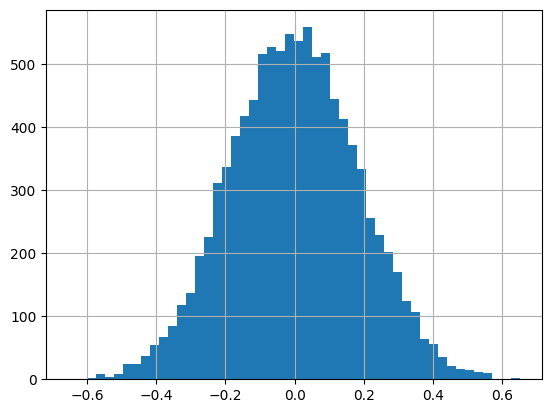

In [71]:
## можем ли мы получить высокую корреляцию с нашей целевой переменной?
ccY = X.corrwith(Y)
## посмотрите на распределение значений. Есть ли такие "гены", абсолютное значение коэффициента корреляции для которых > 0.5
## <ваш код>
ccY.hist(bins=50)
(ccY > 0.5).sum()

In [72]:
## теперь давайте проведем аналогичный эксперимент для нашей матрицы X...
## определим "коэкспрессию" ...
ccX = X.corr()


In [73]:
## Посмотрите на респределение абсолютных значений коэффициентов корреляции Пирсона
## Например для первого гена из нашего массива данных:
ccX.iloc[0,1:]
## много ли получилось генов с коэфф. корреляции > 0.5?

1      -0.088388
2      -0.261085
3       0.023362
4      -0.051416
5       0.105354
          ...   
9995    0.019025
9996   -0.137828
9997   -0.020911
9998   -0.146405
9999   -0.130918
Name: 0, Length: 9999, dtype: float64

In [74]:
(ccX.iloc[0,1:] > 0.5).sum()

20

In [75]:
## Попробуйте увеличить/уменьшить количество наблюдений N = 10, N = 100
print("При N = 10")
N1 = 10
Y1 = pd.Series(np.random.normal(0, 1, N1)) 
X1 = pd.DataFrame( np.random.normal(0, 1, (N1, D)) ) 
ccY1 = X1.corrwith(Y1)
y1 = (ccY1 > 0.5).sum()
print(y1)
ccX1 = X1.corr()
x1 = (ccX1.iloc[0,1:] > 0.5).sum()
print(x1)

При N = 10
711
748


In [76]:
print("При N = 100")
N2 = 100
Y2 = pd.Series(np.random.normal(0, 1, N2)) 
X2 = pd.DataFrame( np.random.normal(0, 1, (N2, D)) ) 
ccY2 = X2.corrwith(Y2)
y2 = (ccY2 > 0.5).sum()
display(y2)
ccX2 = X2.corr()
x2 = (ccX2.iloc[0,1:] > 0.5).sum()
display(x2)

При N = 100


0

0

In [77]:
## Попробуйте использовать меньшее количество переменных: D = 100, 500, 5000
print("При D = 100")
D1 = 100
Y3 = pd.Series(np.random.normal(0, 1, N)) 
X3 = pd.DataFrame( np.random.normal(0, 1, (N, D1)) ) 
ccY3 = X3.corrwith(Y3)
y3 = (ccY3 > 0.5).sum()
print(y3)
ccX3 = X3.corr()
x3 = (ccX3.iloc[0,1:] > 0.5).sum()
print(x3)

При D = 100
1
0


In [78]:
print("При D = 500")
D2 = 500
Y4 = pd.Series(np.random.normal(0, 1, N)) 
X4 = pd.DataFrame( np.random.normal(0, 1, (N, D2)) ) 
ccY4 = X4.corrwith(Y4)
y4 = (ccY4 > 0.5).sum()
print(y4)
ccX4 = X4.corr()
x4 = (ccX4.iloc[0,1:] > 0.5).sum()
print(x4)

При D = 500
1
0


In [79]:
print("При D = 5000")
D3 = 5000
Y5 = pd.Series(np.random.normal(0, 1, N)) 
X5 = pd.DataFrame(np.random.normal(0, 1, (N, D3) )) 
ccY5 = X5.corrwith(Y5)
y5 = (ccY5 > 0.5).sum()
print(y5)
ccX5 = X5.corr()
x5 = (ccX5.iloc[0,1:] > 0.5).sum()
print(x5)

При D = 5000
17
11


In [80]:
## 1. Чем обусловлены наши проблемы с этим набором данных? 2. Как можно бороться со случайными корреляциями?
# 1. Корелляция увеличивается с возрастанием количества наблюдений и уменьшением количества переменных
# 2. Увеличить количество наблюдений или использовать частные корреляции

In [81]:
## Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?
# Так как при множественной проверке гипотез вероятность получить ложно-положительный результат увеличивается.


Тем, для кого выражение "p-hacking" незнакомо -- обязательно смотреть статьи: 
* https://en.wikipedia.org/wiki/Data_dredging
* https://ru.wikipedia.org/wiki/Поправка_на_множественную_проверку_гипотез
* http://www.machinelearning.ru/wiki/index.php?title=Множественная_проверка_гипотез

Для развлечения:  
http://www.tylervigen.com/spurious-correlations

### 3. Полиномиальная регрессия (1 балл).

Вам предлагается самим поэксперементировать с построением полиномиальной регрессией, способной приблизить функцию **myy**. Постройте модели для нескольких степеней (1, 2, 4, 15) и определите среднеквадратичную ошибку предсказания. Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей (что иллюстрирует этот эксперимент)?

In [82]:
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [83]:
def myy(x):
    return np.cos(1.5 * np.pi * x)

def poly_lm(X,y, dg):
    polynomial_features = PolynomialFeatures(degree=dg,
                                             include_bias=False)
    linear_regression = lm.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    return pipeline

np.random.seed(0)
X = np.random.rand(70) ## набор тренировочных данных X
y = myy(X) + np.random.randn(70) * 0.1 ## набор истинных значений y для тренировочного набора

X_test = np.linspace(-.01, 1.01, 30)  ## набор тестовых данных X
y_test = myy(X_test) ## набор истинных значений y для тестового набора

In [84]:
## получим модель для степени = 1, 2, 4, 15
deg1 = poly_lm( X, y, dg = 1  )
## выполним предсказание для тестового набора
y_t1 = deg1.predict(X_test[:, np.newaxis])
## определите среднеквадратичную ошибку предсказания для тестового набора и для тренировочного набора
# metrics.mean_squared_error(y_true, y_predicted)
sqerr = metrics.mean_squared_error(y_test, y_t1)
display(sqerr)
y_t2 = deg1.predict(X[:, np.newaxis])
sqerr2 = metrics.mean_squared_error(y, y_t2)
print(sqerr2)


0.2182509327266069

0.20088202759770454


In [85]:
## аналогично поступите для степени 2, 4 и 15
print("Степень 2")
print("===================")
deg2 = poly_lm(X, y, dg = 2)
y_t1 = deg2.predict(X_test[:, np.newaxis])
y_t2 = deg2.predict(X[:, np.newaxis])
sqerr1 = metrics.mean_squared_error(y_test, y_t1)
print(sqerr1)
sqerr2 = metrics.mean_squared_error(y, y_t2)
print(sqerr2)
print("Степень 4")
print("===================")
deg4 = poly_lm( X, y, dg = 4 )
y_t1 = deg4.predict(X_test[:, np.newaxis])
y_t2 = deg4.predict(X[:, np.newaxis])
sqerr1 = metrics.mean_squared_error(y_test, y_t1)
print(sqerr1)
sqerr2 = metrics.mean_squared_error(y, y_t2)
print(sqerr2)
print("Степень 15")
print("===================")
deg15 = poly_lm( X, y, dg = 15 )
y_t1 = deg15.predict(X_test[:, np.newaxis])
y_t2 = deg15.predict(X[:, np.newaxis])
sqerr1 = metrics.mean_squared_error(y_test, y_t1)
print(sqerr1)
sqerr2 = metrics.mean_squared_error(y, y_t2)
print(sqerr2)
print("===================")

Степень 2
0.04580414819512739
0.0381909954797023
Степень 4
0.00151125786090738
0.009490399401916517
Степень 15
0.2821032411097693
0.006874034649833933


In [86]:
## Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей?
# Модель со степенью 4 из-за значения среднеднеквадратической ошибки предсказания. 
# При степени 15 мы столкнулись с переобучением (среднеквадратическая ошибка на тренировочном наборе меньше, чем на тестовом.)

### 4. Шкалирование данных (2 балла).

Для этого задания часть датасетов генерируется в коде, часть - приложена в виде файла к вашему ДЗ. Необходимо ответить на следующие вопросы:
1. Зачем нужно проводить шкалирование данных? 
2. Всегда ли это нужно делать?
3. Какой/какие из предоставленных вам наборов надо шкалировать? Обоснуйте свой ответ при помощи кода.

In [87]:
X1, Y1 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=None, 
                             shuffle = False,
                             random_state=42)

X2, Y2 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=1, 
                             shuffle = False,
                             random_state=42)

XY3 = pd.read_csv('Вальдемар Сергеевич Медведев - X3.csv')
X3, Y3 = XY3.iloc[:,1:], XY3.Y

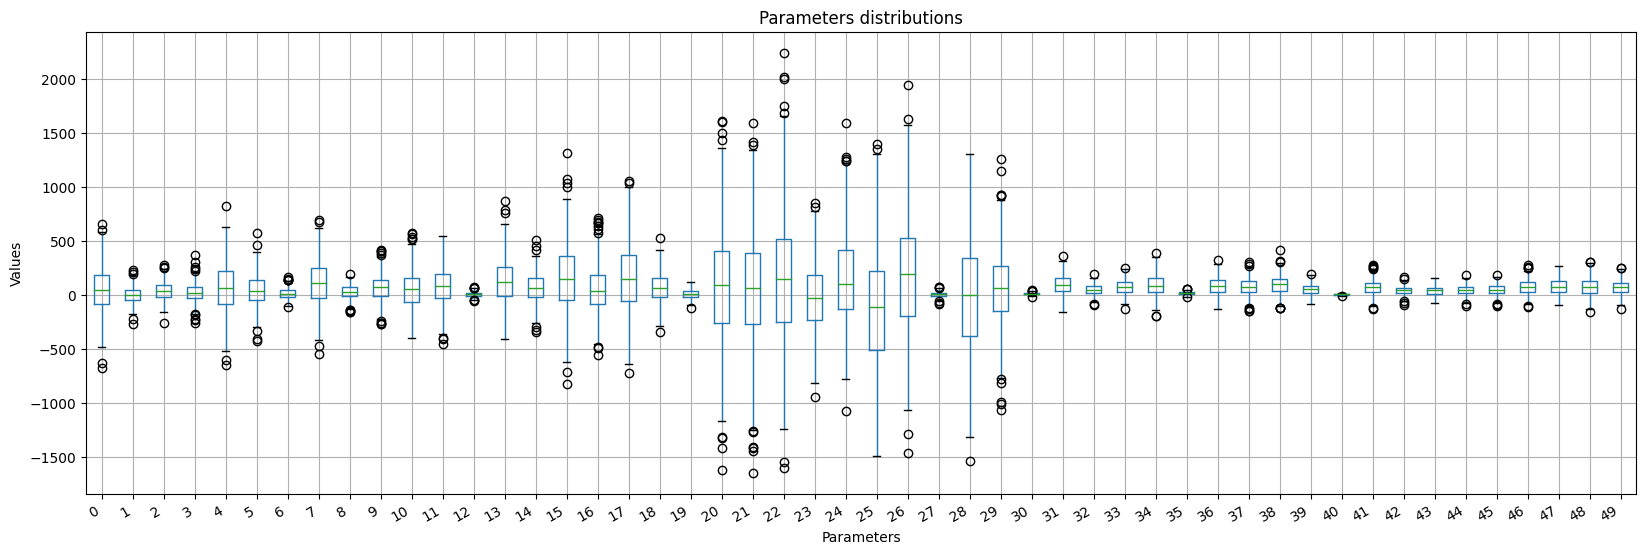

In [88]:
forx1 = pd.DataFrame(data=X1)
p = forx1.boxplot(figsize = (20 ,6))
p.set_title('Parameters distributions')
p.set_xlabel('Parameters')
p.set_ylabel('Values')
_ = plt.setp(p.get_xticklabels(), rotation=30, horizontalalignment='right')

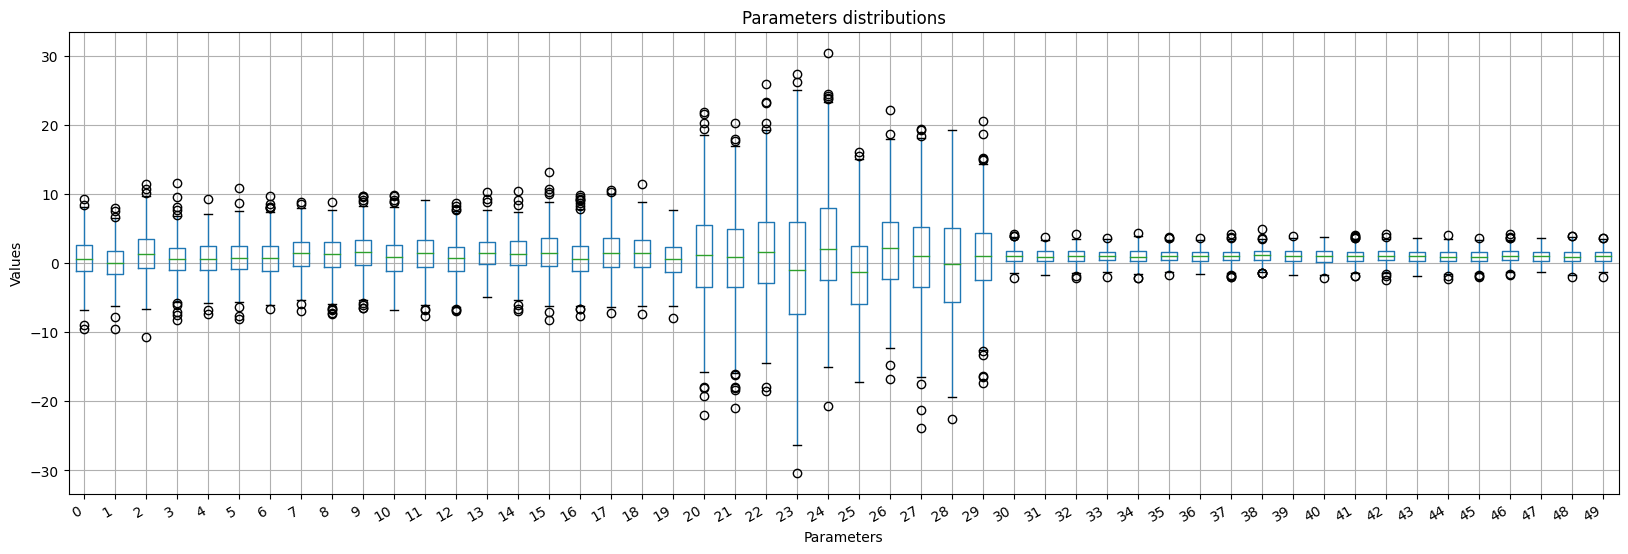

In [97]:
forx2 = pd.DataFrame(data=X2)
p = forx2.boxplot(figsize = (20,6))
p.set_title('Parameters distributions')
p.set_xlabel('Parameters')
p.set_ylabel('Values')
_ = plt.setp(p.get_xticklabels(), rotation=30, horizontalalignment='right')

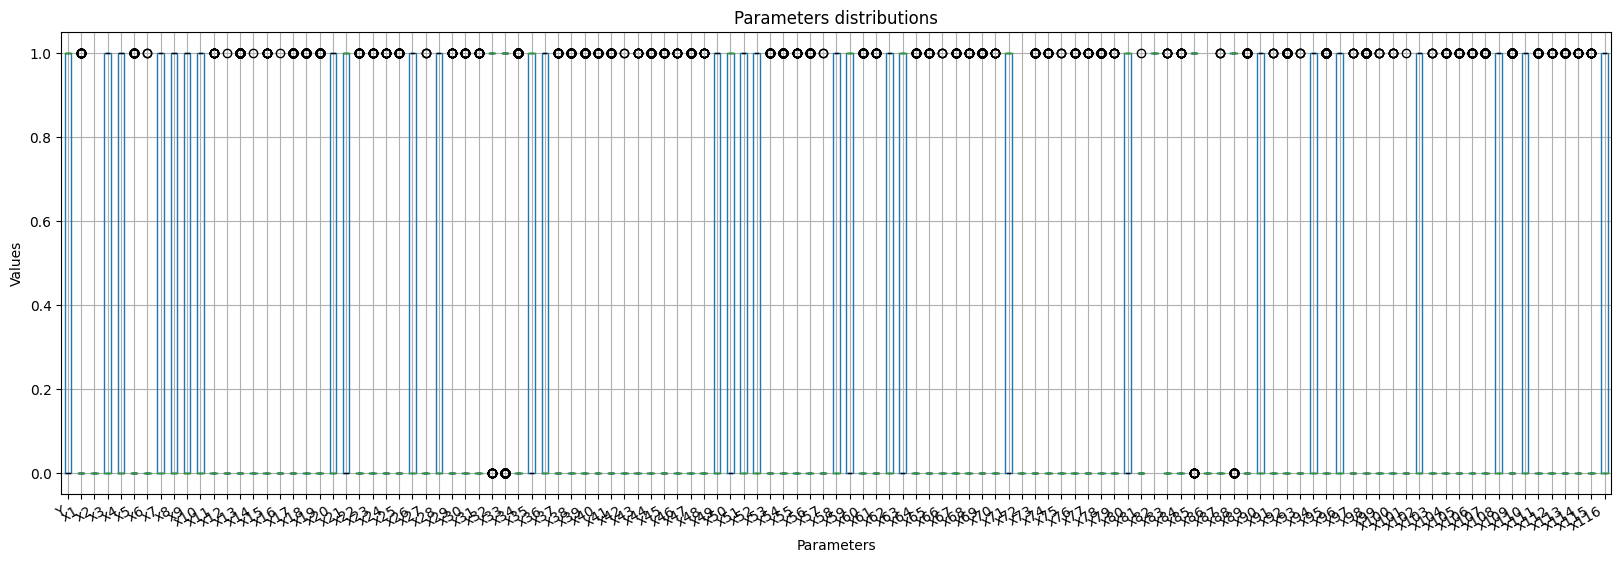

In [98]:
forxy3 = pd.DataFrame(data=XY3)
p = forxy3.boxplot(figsize = (20,6))
p.set_title('Parameters distributions')
p.set_xlabel('Parameters')
p.set_ylabel('Values')
_ = plt.setp(p.get_xticklabels(), rotation=30, horizontalalignment='right')

In [91]:
# 1. Шкалирование данных нужно делать, так как атрибуты могут быть в разных диапазонах.
# 2. Не всегда, иногда это может ухудшить качество модели.
# 3. Необходимо шкалировать 1 и 2 набор данных.

### 5. Нестандартные данные (2 балла).

Вам дан набор неразмеченных данных X4. Проведите его анализ с помощью PCA, визуализируйте результат. Какие выводы вы можете сделать? Чем может быть обусловлена такая картина? Как стоит поступить? Можете сразу проверить свою гипотезу.

In [92]:
X4 = pd.read_csv('Вальдемар Сергеевич Медведев - X4.csv')

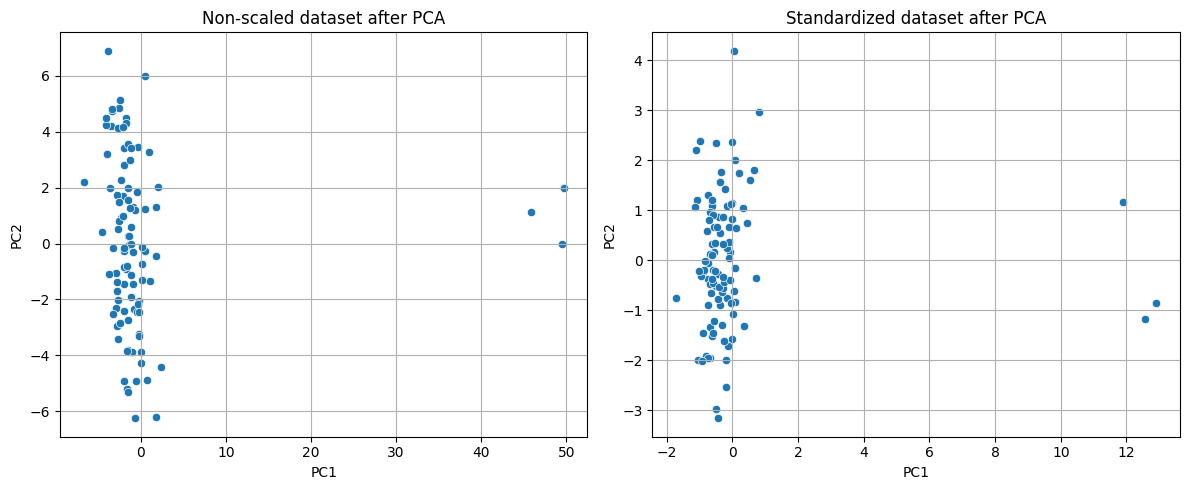

In [93]:
## Проведите его анализ с помощью PCA. 
## Визуализируйте результат.
scaler = StandardScaler()
scaler.fit(X4.astype('float64'))
Xsc = scaler.transform(X4.astype('float64'))
Xsc = pd.DataFrame(Xsc, index = X4.index, columns=X4.columns)
sklearn_pca = PCA(n_components = 4) 
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(Xsc), columns = ['PC1','PC2', 'PC3', 'PC4'])
sklearn_pca_unsc = PCA(n_components=4) 
sklearn_transf_unsc = pd.DataFrame(sklearn_pca_unsc.fit_transform(X4), columns = ['PC1','PC2','PC3', 'PC4' ])
    
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf_unsc, ax = ax1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf, ax = ax2)
ax1.set_title('Non-scaled dataset after PCA')
ax2.set_title('Standardized dataset after PCA')
ax1.grid()
ax2.grid()

plt.tight_layout()


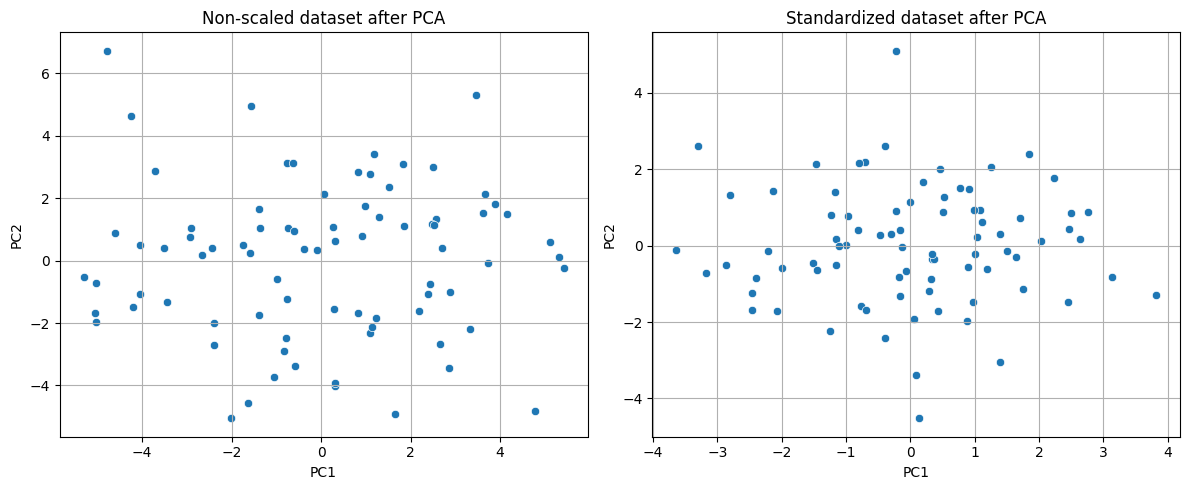

In [94]:
for i in X4.columns:
    Q1 = X4[i].quantile(0.25)
    Q3 = X4[i].quantile(0.75)
    IQR = Q3 - Q1
    u = Q3 + 1.5*IQR
    l = Q1 - 1.5*IQR
    X4 = X4[(X4[i] > l) & (X4[i] < u)]

scaler = StandardScaler()
scaler.fit(X4.astype('float64'))
Xsc = scaler.transform(X4.astype('float64'))
Xsc = pd.DataFrame(Xsc, index = X4.index, columns = X4.columns)
sklearn_pca = PCA(n_components = 4) 
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(Xsc), columns = ['PC1','PC2', 'PC3', 'PC4'])
sklearn_pca_unsc = PCA(n_components=4) 
sklearn_transf_unsc = pd.DataFrame(sklearn_pca_unsc.fit_transform(X4), columns = ['PC1','PC2','PC3', 'PC4' ])
    
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf_unsc, ax = ax1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf, ax = ax2)
ax1.set_title('Non-scaled dataset after PCA')
ax2.set_title('Standardized dataset after PCA')
ax1.grid()
ax2.grid()

plt.tight_layout()

In [95]:
## Какие выводы вы можете сделать? Чем может быть обусловлена такая картина? Как стоит поступить?
# Данные стали равномернее распределены, но при этом они стали более разреженными.

### 6. Нестандартные данные - 2 (бонусное на 1 балл).

Здесь мы наглядно познакомимся с тем, что такое серийные эффекты (batch effect). 
Вам дан набор данных 'expr_data.tsv'. 
1. Какая переменная в вашем наборе данных указывает на возможное присутствие серийных эффектов? С чем могут быть связаны серийные эффекты?
2. Ваша задача попытаться найти маркерные признаки. Имеет ли ваша задача решение?
3. Какие проблемы вы заметили в данных? Можно ли с ними бороться? Имеет ли это смысл в данном случае?

In [ ]:
## <здесь должен быть ваш код>